<a href="https://colab.research.google.com/github/JenBanks8585/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random


## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [437]:
#Creating an array with the given values

sales_past_week=np.array([3505, 2400, 3027, 2798, 3700, 3250, 2689])
sales_past_week

array([3505, 2400, 3027, 2798, 3700, 3250, 2689])

In [438]:
# Creating a list comprehension that calculates mean

sales_past_week_mean= sum([a for a in sales_past_week])/len(sales_past_week)
print('sales_past_week_mean: ', sales_past_week_mean)
print('sales_past_week_mean: ', '{:.2f}'.format(sales_past_week_mean))

sales_past_week_mean:  3052.714285714286
sales_past_week_mean:  3052.71


In [439]:
# Creating a list comprehension that calculates variance

sales_past_week_variance= sum([(a-sales_past_week_mean)**2 for a in sales_past_week])/len(sales_past_week)
print('sales_past_week_variance: ', sales_past_week_variance)
print('sales_past_week_variance: ', '{:.2f}'.format(sales_past_week_variance))

sales_past_week_variance:  183761.06122448976
sales_past_week_variance:  183761.06


In [440]:
# Creating a list comprehension that calculates standard deviation

sales_past_week_std= (sum([(a-sales_past_week_mean)**2 for a in sales_past_week])/len(sales_past_week))**.5
print('sales_past_week_std: ', sales_past_week_std)
print('sales_past_week_std: ', '{:.2f}'.format(sales_past_week_std))

sales_past_week_std:  428.67360686714756
sales_past_week_std:  428.67


In [441]:
# Checking computations using library

print(sales_past_week.mean())
print(sales_past_week.var())
print(sales_past_week.std())


3052.714285714286
183761.06122448976
428.67360686714756


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [442]:
# Creating an array for customers

customers= np.array([127, 80, 105, 92, 120, 115, 93] )
customers

array([127,  80, 105,  92, 120, 115,  93])

In [443]:
# Computing covariance betwee sales and number of customers

np.cov(customers, sales_past_week)

array([[   290.95238095,   7604.35714286],
       [  7604.35714286, 214387.9047619 ]])

In [444]:
#Creating a dataframe

df=pd.DataFrame({'customers':[127, 80, 105, 92, 120, 115, 93],
                 'sales':[3505, 2400, 3027, 2798, 3700, 3250, 2689]})
df

,customers,sales
0,127,3505
1,80,2400
2,105,3027
3,92,2798
4,120,3700
5,115,3250
6,93,2689


In [445]:
#Checking covariance using pandas library

df.cov()

,customers,sales
customers,290.952381,7604.357143
sales,7604.357143,214387.904762


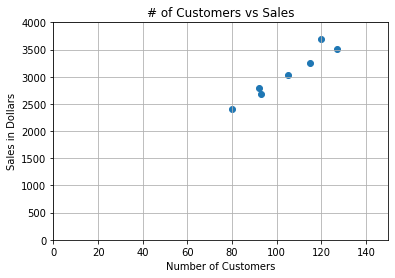

In [446]:
# Visualization

plt.scatter(customers, sales_past_week)
plt.xlim(0,150)
plt.ylim(0, 4000)
plt.grid()

plt.xlabel('Number of Customers')
plt.ylabel('Sales in Dollars')
plt.title('# of Customers vs Sales')

plt.show()

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [447]:
# Creating a list comprehension that calculates mean of cutomers

customers_mean= sum([a for a in customers])/len(customers)
print('customers_mean: ', '{:.2f}'.format(customers_mean))

# Creating a list comprehension that calculates variance of cutomers

customers_variance= sum([(a-customers_mean)**2 for a in customers])/len(customers)
print('customers_variance: ', '{:.2f}'.format(customers_variance))

# Creating a list comprehension that calculates standard deviation of customers

customers_std= (sum([(a-customers_mean)**2 for a in customers])/len(customers))**.5
print('customers_std: ', '{:.2f}'.format(customers_std))

customers_mean:  104.57
customers_variance:  249.39
customers_std:  15.79


In [448]:
# Double check using library

print('{:.2f}'.format(customers.mean()))
print('{:.2f}'.format(customers.var()))
print('{:.2f}'.format(customers.std()))

104.57
249.39
15.79


In [449]:
# Computing for Correlation Coefficient by hand

df_correff= df['customers'].cov(df['sales'])/((df['customers']).std()*(df['sales']).std())
df_correff

0.9628339778148909

In [450]:
#Checking using pandas

df['customers'].corr(df['sales'])

0.9628339778148909

In [451]:
#Checking using numpy library
np.corrcoef(customers, sales_past_week)


array([[1.        , 0.96283398],
       [0.96283398, 1.        ]])

In [452]:
#Checking again by pandas, another way

df.corr()

,customers,sales
customers,1.000000,0.962834
sales,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [453]:
titanic=pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
titanic.head(3)

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [454]:
#Calcuting covariance matrix

titanic.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [455]:
#Calcuting correlation coefficient matrix

titanic.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


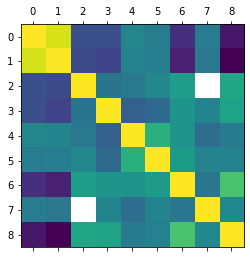

In [456]:
#Using matplotlib to visualize correlation

plt.matshow(titanic.corr());

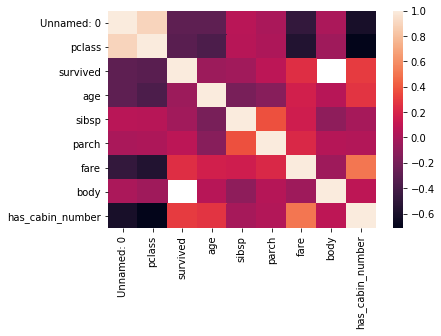

In [457]:
#Using seaborn to visualize correlation

import seaborn as sns

sns.heatmap(titanic.corr());


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

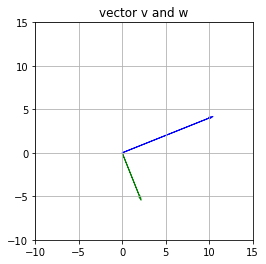

In [458]:
fig, ax = plt.subplots()
ax.grid()
plt.subplots_adjust(wspace=20, hspace=1)

v = [2, -5]
w = [10, 4]

plt.arrow(0, 0, 2, -5,  head_width=.2, head_length=0.5, color = 'g')
plt.arrow(0, 0, 10, 4,  head_width=.2, head_length=0.5, color = 'b')


ax.set_xlim([-10, 15])
ax.set_ylim([-10, 15])
plt.gca().set_aspect("equal")

plt.title('vector v and w')
plt.show()

In [459]:
np.dot(v,w)

0

In [460]:
np.matmul(v,w)

0

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [461]:
#Creating the arrays

aa=np.array([-5,3,7])
bb=np.array([6,-8,2])
print('aa','\n' , aa, '\n','bb','\n', bb)

aa 
 [-5  3  7] 
 bb 
 [ 6 -8  2]


In [462]:
#Checking for orthogonality
#1e-10 is an arbitrary small number close to 0

def ortho(a,b):
  ortho =np.dot(a,b)
  if ortho<1e-10:
    print(ortho, ':The vectors are orthogonal')
  else:
    print(ortho, ':The vectors are not orthogonal')

ortho(aa,bb)

-40 :The vectors are orthogonal


In [463]:
#Creating a vector orthogonal to a given vector
given=np.random.randn(3)
ort_vect=np.random.randn(3)

ort_vect -=ort_vect.dot(given)*given/np.linalg.norm(given)**2
print(given)
print(ort_vect)

[-0.50020198  0.79413718  0.39059928]
[ 0.5546117   0.52238919 -0.35184603]


In [464]:
#Checking for orthogonality

ortho(given,ort_vect)

-5.551115123125783e-17 :The vectors are orthogonal


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [465]:
# Vector norm

c= np.array([2, -15, 6, 20])

c_norm= (sum([a**2 for a in c]))**.5         # computtaion by hand
cnorm=np.linalg.norm(c)                      # computation using library

c_unit= c/c_norm                             # computing unit vector
c_unit_norm= np.linalg.norm(c_unit)          # computing length of unit vector

print('c_norm:' , c_norm)
print('cnorm:' , cnorm)
print('unit vector:', c_unit)
print('unit vector norm:', c_unit_norm)


c_norm: 25.787593916455254
cnorm: 25.787593916455254
unit vector: [ 0.07755667 -0.58167505  0.23267002  0.77556673]
unit vector norm: 1.0


## What is $||c||^2$? 

In [466]:
c_norm_square= c_norm**2
c_norm_square


665.0

## What is $c \cdot c$? 

In [467]:
cdotc=np.dot(c,c)
cdotc

665

## What is $c^{T}c$?

In [468]:
c_transpose=c.T
np.dot(c_transpose,c)

665

They are all equal in value

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

$\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
d = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix}+ 12\begin{bmatrix} 0 \\ 1\end{bmatrix}= 7\hat{i} + 12\hat{j}
\end{align}$



$\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\qquad
e = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 00\end{bmatrix} - 8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} = 2\hat{i} + 11\hat{j}- 8\hat{k}
\end{align}$

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [469]:
# Vector norm

f= np.array([4, 12, 11, 9, 2])

f_norm= (sum([a**2 for a in f]))**.5         # computtaion by hand
fnorm=np.linalg.norm(f)                      # computation using library

f_unit= f/f_norm                             # computing unit vector
f_unit_norm= np.linalg.norm(f_unit)          # computing length of unit vector

print('f_norm:' , f_norm)
print('fnorm:' , fnorm)
print('unit vector:', f_unit)
print('unit vector norm:', f_unit_norm)

f_norm: 19.131126469708992
fnorm: 19.131126469708992
unit vector: [0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]
unit vector norm: 0.9999999999999999


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

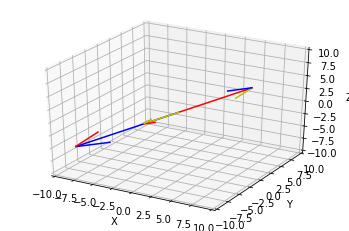

In [471]:
# Plotting Linearly Dependent Vectors on a 3d graph.
from mpl_toolkits.mplot3d import Axes3D

#t = [[-4], [-1], [-5]]
red=np.multiply(-2,blue)

blue = np.array([[0, 0, 0, -4, -1, -3]])
red = np.array(vect2)
yellow= np.array(blue.__mul__(3))

colors = ['b','r','y'] 

X, Y, Z, U, V, W = zip(*yellow, *red, *blue)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, color=colors, length=1)
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_zlim([-10, 10])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

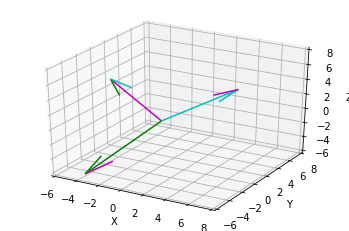

In [472]:
# Plotting Linearly Independent Vectors on a 3d graph.

cyan = np.array([[0, 0, 0, 4, 5, 3]])
magenta = np.array([[0, 0, 0, -2, -4, 7]])
green= np.array([[0,0,0,-4,-5,-6]])

colors2 = ['c','m','g'] 

X, Y, Z, U, V, W = zip(*cyan, *magenta, *green)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W,color=colors2, length=1)
ax.set_xlim([-6, 8])
ax.set_ylim([-6, 8])
ax.set_zlim([-6, 8])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
#Creating arrays

g=np.array([1,2])
h=np.array([4,8])

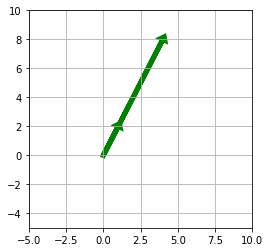

In [474]:
#Plotting them on a grid

fig, ax= plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-5,10)
plt.ylim(-5,10)

for myvect in [g, h]:
  plt.arrow(0,0,
            myvect[0],
            myvect[1],
            head_width=0.3,
            head_length= 0.2,
            linewidth= 5,
            color='g')

In [475]:
# one possible combination
k,m=(4,5)
combo1=np.multiply(g,k)+np.multiply(h,m)
print('one combinatin' ,combo1)



one combinatin [24 48]


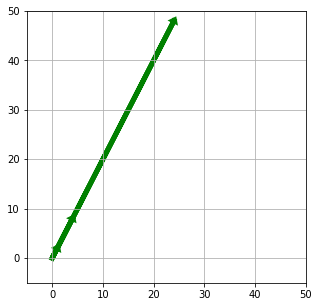

In [477]:
#Plotting the combinations on a grid

fig, ax= plt.subplots(figsize=(5,5))
ax.grid()

plt.xlim(-5,50)
plt.ylim(-5,50)



for myvect in [g, h,combo1]:
  plt.arrow(0,0,
            myvect[0],
            myvect[1],
            head_width=0.3,
            head_length= 0.2,
            linewidth= 5,
            color='green')

These vectors are linearly dependent so their span is that dimension where they are all located.

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
#Creating arrays

l=np.array([1,2,3])
m=np.array([-1, 0, 7])
n=np.array([4,8, 2])

In [479]:
# one possible combination
p,q,r=(2,3,4)
combo2=np.multiply(l,p)+np.multiply(m,q) + np.multiply(n,r)

print('one combination' ,combo2)

one combination [15 36 35]


In [480]:
# A for loop for given list of multipliers

all_combos=[]
for (p,q,r) in [(1,2,3), (-3,2,4), (-2,-3,-4), (2,-5,-6)]:
  linear_combo= np.multiply(l,p)+np.multiply(m,q) + np.multiply(n,r)
  all_combos.append(linear_combo)
print(all_combos)

[array([11, 26, 23]), array([11, 26, 13]), array([-15, -36, -35]), array([-17, -44, -41])]


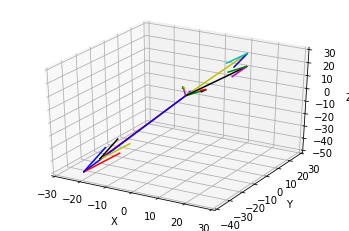

In [481]:
#Plotting the original vectors and the resulting combinations is one space

cyan = np.array([[0, 0, 0, 4, 5, 3]])
magenta = np.array([[0, 0, 0, -2, -4, 7]])
green= np.array(vector4.__sub__(3))

l=np.array([[0,0,0,1,2,3]])
m=np.array([[0,0,0,-1, 0, 7]])
n=np.array([[0,0,0,4,8, 2]])
comb1=np.array([[0,0,0,11, 26, 23]])
comb2=np.array([[0,0,0,11, 26, 13]])
comb3=np.array([[0,0,0,-15, -36, -35]])
comb4=np.array([[0,0,0,-17, -44, -41]])

colors2 = ['c','m','g', 'y', 'k', 'r', 'b'] 

X, Y, Z, U, V, W = zip(*l, *m, *n, *comb1, *comb2, *comb3, *comb4)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W,color=colors2, length=1)
ax.set_xlim([-30, 30])
ax.set_ylim([-40, 30])
ax.set_zlim([-50, 30])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()



Since none of th3 3 vectors are colinear, then the span is the infinite 3d space.

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



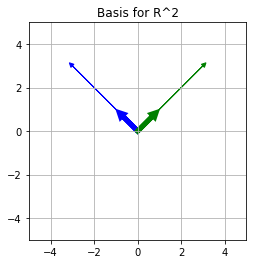

In [482]:
# find basis vectors in 2-d

blue = np.array([-3, 3])
green = np.array([3, 3])

bluenorm=np.linalg.norm(blue)                      # computing norm of blue vector
greennorm=np.linalg.norm(green)                    # computing norm of green vector

blue_unit= blue/blue_norm                          # computing unit vector of blue vector
green_unit= green/green_norm                       # computing unit vector of green vector

# Plot the original and Scaled Vectors
plt.arrow(0,0, blue[0], blue[1],head_width=.2, head_length=0.2, color ='blue')
plt.arrow(0,0, green[0], green[1],head_width=.2, head_length=0.2, color ='green')
plt.arrow(0,0, blue_unit[0], blue_unit[1],head_width=.2, head_length=0.2,linewidth= 5, color ='blue')
plt.arrow(0,0, green_unit[0], green_unit[1],head_width=.2, head_length=0.2,linewidth=5, color ='green')

plt.grid()
plt.xlim(-5,5)          
plt.ylim(-5,5)
plt.gca().set_aspect("equal")

plt.title("Basis for R^2")
plt.show()

## 6.2 What does it mean to form a basis?

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [483]:
# Rank three
P = np.array([[1,2,3],[-1,0,7],[4,8,2]])
np.linalg.matrix_rank(P)


3

In [484]:
# Return a 3-D array with ones on the diagonal and zeros elsewhere.
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## 7.2 What does the rank of a matrix tell us?

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

scalar projection: 0.4999999999999999
vector projection: [0.5 1.5]


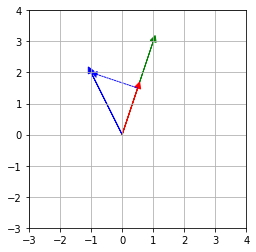

In [488]:
# Original Vectors
green1 = np.array([1,3])
blue1 = np.array([-1,2])

green1_norm=np.linalg.norm(green1)           # Computing unit vector of green1
green1_unit=green1/green1_norm               # computing unit vector for green1

scalar_proj= (np.dot(blue1, green1))/(green1_norm**2)   #Scalar projection of blue on green
print('scalar projection:',scalar_proj)

project=np.multiply(scalar_proj,green1)                 # Vector projection
print('vector projection:',project)

plt.arrow(0,0, blue1[0], blue1[1],head_width=.2, head_length=0.2, color ='blue')
plt.arrow(0,0, green1[0], green1[1],head_width=.2, head_length=0.2, color ='green')
plt.arrow(0,0, project[0], project[1],head_width=.2, head_length=0.2, color ='red')
plt.arrow(project[0],project[1], -1.5, .5 ,head_width=.2, head_length=0.2, color ='blue', linestyle='dotted',length_includes_head=True)

plt.grid()
plt.gca().set_aspect("equal")
plt.xlim(-3,4)          
plt.ylim(-3,4)

plt.show();

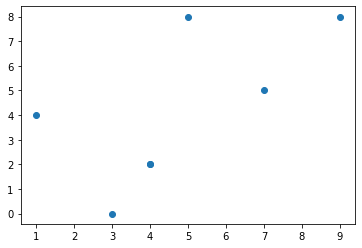

In [489]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()